### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset 

In [5]:
df = pd.read_csv('train.csv')
df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336


In [6]:
df.isna().sum()

waktu_setempat      0
id_jalan            0
id_titik_mulai      0
id_titik_akhir      0
rerata_kecepatan    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398648 entries, 0 to 398647
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   waktu_setempat    398648 non-null  object 
 1   id_jalan          398648 non-null  int64  
 2   id_titik_mulai    398648 non-null  int64  
 3   id_titik_akhir    398648 non-null  int64  
 4   rerata_kecepatan  398648 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.2+ MB


In [8]:
df.waktu_setempat.plot.hist()


TypeError: no numeric data to plot

## Parsing Dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter

In [9]:
df = pd.read_csv('train.csv'
                , parse_dates=['waktu_setempat'])
df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398648 entries, 0 to 398647
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   waktu_setempat    398648 non-null  datetime64[ns, UTC]
 1   id_jalan          398648 non-null  int64              
 2   id_titik_mulai    398648 non-null  int64              
 3   id_titik_akhir    398648 non-null  int64              
 4   rerata_kecepatan  398648 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3)
memory usage: 15.2 MB


In [15]:
df.waktu_setempat[:1000]

0     2020-02-01 01:00:00+00:00
1     2020-02-01 01:00:00+00:00
2     2020-02-01 01:00:00+00:00
3     2020-02-01 01:00:00+00:00
4     2020-02-01 01:00:00+00:00
                 ...           
995   2020-02-01 02:00:00+00:00
996   2020-02-01 02:00:00+00:00
997   2020-02-01 02:00:00+00:00
998   2020-02-01 02:00:00+00:00
999   2020-02-01 02:00:00+00:00
Name: waktu_setempat, Length: 1000, dtype: datetime64[ns, UTC]

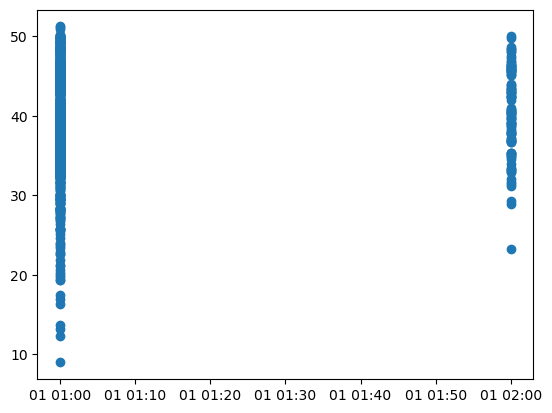

In [14]:
fig, ax = plt.subplots()
ax.scatter(df["waktu_setempat"][:1000], df["rerata_kecepatan"][:1000])

## Sort DataFrame by saledate
When working with time series data, it's a good idea to sort it by date.



In [16]:
# Sort DataFrame in date order
df.sort_values(by=["waktu_setempat"], inplace=True, ascending=True)
df.waktu_setempat.head(20)

0     2020-02-01 01:00:00+00:00
589   2020-02-01 01:00:00+00:00
590   2020-02-01 01:00:00+00:00
591   2020-02-01 01:00:00+00:00
592   2020-02-01 01:00:00+00:00
593   2020-02-01 01:00:00+00:00
594   2020-02-01 01:00:00+00:00
595   2020-02-01 01:00:00+00:00
596   2020-02-01 01:00:00+00:00
597   2020-02-01 01:00:00+00:00
598   2020-02-01 01:00:00+00:00
599   2020-02-01 01:00:00+00:00
588   2020-02-01 01:00:00+00:00
600   2020-02-01 01:00:00+00:00
602   2020-02-01 01:00:00+00:00
603   2020-02-01 01:00:00+00:00
604   2020-02-01 01:00:00+00:00
605   2020-02-01 01:00:00+00:00
606   2020-02-01 01:00:00+00:00
607   2020-02-01 01:00:00+00:00
Name: waktu_setempat, dtype: datetime64[ns, UTC]

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126
1,2020-02-01 01:00:00+00:00,50841260,196143,5669475346,43.472
2,2020-02-01 01:00:00+00:00,26785612,300501567,2177848411,41.034
3,2020-02-01 01:00:00+00:00,3688059,2652085279,1207440535,43.786
4,2020-02-01 01:00:00+00:00,24704286,130234354,32636795,22.869
...,...,...,...,...,...
398643,2020-02-22 23:00:00+00:00,182210371,1314925464,1314925496,41.367
398644,2020-02-22 23:00:00+00:00,1210,1663461749,582492979,47.287
398645,2020-02-22 23:00:00+00:00,4004732,3736247465,301723,28.941
398646,2020-02-22 23:00:00+00:00,1210,199878,582492979,49.493


## Make copy

In [19]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

## Add datetime parameters `waktu_setempat` column


In [20]:
df_tmp['tahun_setempat'] = df_tmp.waktu_setempat.dt.year
df_tmp['bulan_setempat'] = df_tmp.waktu_setempat.dt.month
df_tmp['hari_setempat'] = df_tmp.waktu_setempat.dt.day
df_tmp['jam_setempat'] = df_tmp.waktu_setempat.dt.hour
df_tmp['menit_setempat'] = df_tmp.waktu_setempat.dt.minute
df_tmp['detik_setempat'] = df_tmp.waktu_setempat.dt.second

df_tmp.drop('waktu_setempat', axis=1, inplace=True)

In [21]:
df_tmp

,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,tahun_setempat,bulan_setempat,hari_setempat,jam_setempat,menit_setempat,detik_setempat
0,691007296,21390008,1425033102,29.126,2020,2,1,1,0,0
1,50841260,196143,5669475346,43.472,2020,2,1,1,0,0
2,26785612,300501567,2177848411,41.034,2020,2,1,1,0,0
3,3688059,2652085279,1207440535,43.786,2020,2,1,1,0,0
4,24704286,130234354,32636795,22.869,2020,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
398643,182210371,1314925464,1314925496,41.367,2020,2,22,23,0,0
398644,1210,1663461749,582492979,47.287,2020,2,22,23,0,0
398645,4004732,3736247465,301723,28.941,2020,2,22,23,0,0
398646,1210,199878,582492979,49.493,2020,2,22,23,0,0


## Tuning Hyperparameter

In [38]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, 1.0, "sqrt" ],
           "max_samples": [10000,50000,100000,200000,300000,350000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=500,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(df_tmp.drop('rerata_kecepatan', axis =1 ), df_tmp['rerata_kecepatan'])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


E:\New\DataScience\Project1\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
475 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
285 fits failed with the following error:
Traceback (most recent call last):
  File "E:\New\DataScience\Project1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\New\DataScience\Project1\env\Lib\site-packages\sklearn\ensemble\_forest.py", line 403, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
                          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\New\DataScience\Project1\env\Lib\site-packages\sklearn\ensemble\_forest.

CPU times: total: 17min 48s
Wall time: 39min 51s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=500,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 1.0, 'sqrt'],
                                        'max_samples': [10000, 50000, 100000,
                                                        200000, 300000,
                                                        350000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [39]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 200000,
 'max_features': 0.5,
 'max_depth': None}

In [57]:
show_scores(rs_model)

NameError: name 'y_train' is not defined

## Modeling with ideal model

In [40]:

%%time
from sklearn.ensemble import RandomForestRegressor
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators= 40,
                                    min_samples_split= 16,
                                    min_samples_leaf= 1,
                                    max_samples= 200000,
                                    max_features= 0.5,
                                    n_jobs= -1,
                                    random_state= 42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(df_tmp.drop('rerata_kecepatan', axis =1 ), df_tmp['rerata_kecepatan'])

CPU times: total: 17.5 s
Wall time: 1.8 s


RandomForestRegressor(max_features=0.5, max_samples=200000,
                      min_samples_split=16, n_estimators=40, n_jobs=-1,
                      random_state=42)

## Make Prediction on Test Data

In [43]:
# Import the test data
df_test = pd.read_csv("test.csv",
                      parse_dates=["waktu_setempat"])

df_test.head()

,id,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir
0,0,2020-02-23 00:00:00+00:00,4004732,32046542,6454026544
1,1,2020-02-23 00:00:00+00:00,182210371,1314925464,1314925496
2,2,2020-02-23 00:00:00+00:00,22932408,1482086782,26481020
3,3,2020-02-23 00:00:00+00:00,182210371,3892883,267337489
4,4,2020-02-23 00:00:00+00:00,66924592,266041030,2592978110


In [44]:
def preprocess_data(df_tmp):
    """
    Performs transformations on df and returns transformed df.
    """
    df_tmp['tahun_setempat'] = df_tmp.waktu_setempat.dt.year
    df_tmp['bulan_setempat'] = df_tmp.waktu_setempat.dt.month
    df_tmp['hari_setempat'] = df_tmp.waktu_setempat.dt.day
    df_tmp['jam_setempat'] = df_tmp.waktu_setempat.dt.hour
    df_tmp['menit_setempat'] = df_tmp.waktu_setempat.dt.minute
    df_tmp['detik_setempat'] = df_tmp.waktu_setempat.dt.second

    df_tmp.drop("waktu_setempat", axis=1, inplace=True)
    df_tmp.drop("id", axis=1, inplace=True)
    
    return df_tmp

In [45]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,id_jalan,id_titik_mulai,id_titik_akhir,tahun_setempat,bulan_setempat,hari_setempat,jam_setempat,menit_setempat,detik_setempat
0,4004732,32046542,6454026544,2020,2,23,0,0,0
1,182210371,1314925464,1314925496,2020,2,23,0,0,0
2,22932408,1482086782,26481020,2020,2,23,0,0,0
3,182210371,3892883,267337489,2020,2,23,0,0,0
4,66924592,266041030,2592978110,2020,2,23,0,0,0


In [46]:
test_preds = ideal_model.predict(df_test)

In [47]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["id"] = df_test.index
df_preds["rerata_kecepatan"] = test_preds
df_preds

,id,rerata_kecepatan
0,0,40.697275
1,1,41.498974
2,2,35.769541
3,3,40.737929
4,4,33.468735
...,...,...
127484,127484,32.311630
127485,127485,36.827292
127486,127486,40.777086
127487,127487,34.251185


In [49]:
# Export prediction data
df_preds.to_csv("submission.csv", index=False)